In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Import

In [2]:
dict_dfs_pre = pd.read_pickle('../data/data_pre.pkl')
dict_dfs_pre.keys()

dict_keys(['others', 'train', 'test'])

In [3]:
X_train = dict_dfs_pre['train']['X']

### Data Visualize

In [4]:
# 設定字型（已顯示中文）
plt.rcParams['font.family'] = 'Noto Sans TC'

In [5]:
# 二元變數分布資料表
def count_01_features(df): 
    
    dict_01FeaCt = {}

    for col in df.columns: 
        ser_ct = df[col].value_counts()
        ct_col = ser_ct.index.name
        ct0 = ser_ct.loc[0] if 0 in ser_ct.index else 0
        ct1 = ser_ct.loc[1] if 1 in ser_ct.index else 0
        dict_01FeaCt[ct_col] = [ct0, ct1]

    df_01FeaCt = pd.DataFrame(dict_01FeaCt, index=['No', 'Yes'])
    return df_01FeaCt

df_01FeaCt = count_01_features(df=X_train.select_dtypes(include='uint8'))


'是否兼具製造業'

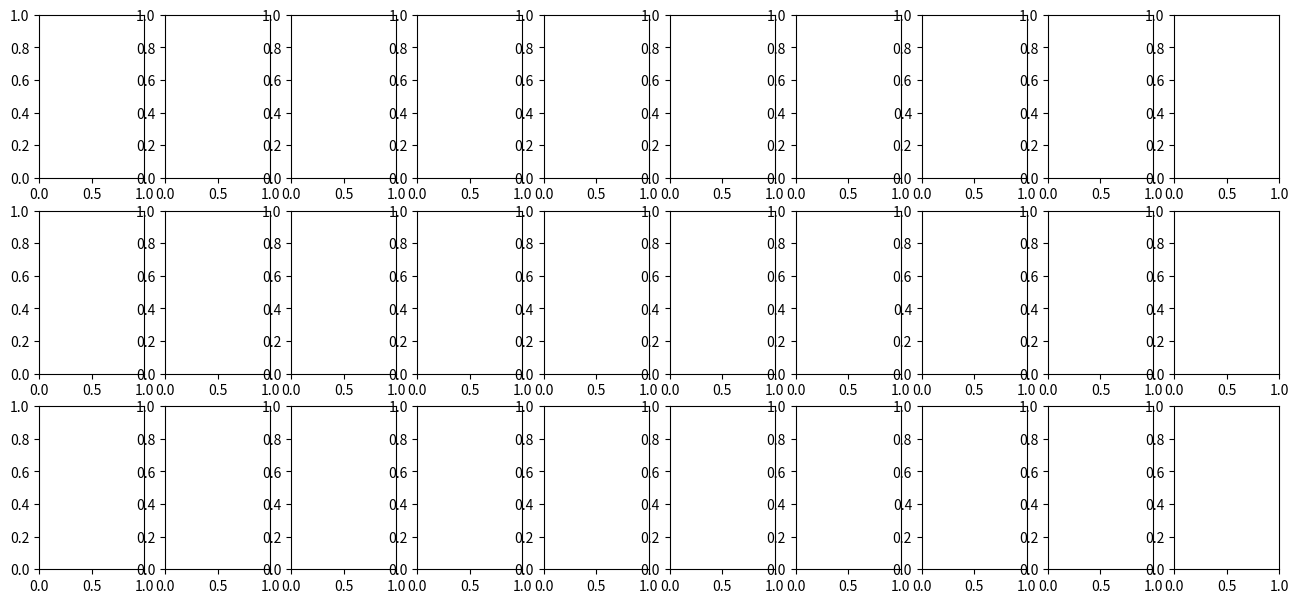

In [25]:
# 畫格
naxs = len(df_01FeaCt.columns)
ncols = 10
nrows = (naxs // ncols) + 1 if naxs % ncols > 0 else (naxs // ncols)
figsize = (1.6*ncols, 2.4*nrows)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

# for i in range(nrows): 
#     for j in range(ncols): 
        
#         title = df_01FeaCt.columns[10*i+j]
#         print(title)
    
#     if (10*i+j) > naxs: break


In [ ]:
count_BooFea = X_train['是否兼具製造業'].value_counts()
barx = np.array(count_BooFea.index).astype(np.str_)
barh = count_BooFea.values
title = count_BooFea.index.name

# Figure
fig, ax = plt.subplots(figsize=(1.6, 2.4))

ax.bar(x=barx, height=barh, width=.6)

ax.set_ylabel(ylabel='Count', fontsize=12)
ax.set_title(label=title, fontsize=14)

fig.tight_layout()
plt.show()

In [ ]:
# Data
count_CatFea = X_train['營業縣市'].value_counts()
barx = np.array(count_CatFea.index)
bary = count_CatFea.values

# Figure
#   Creating a figure containing a single axes 
fig, ax = plt.subplots(figsize=(12, 5))

#   plot some data on the Axes
p = ax.bar(x=barx, height=bary, width=.7)
ax.bar_label(p, fmt='{:,.0f}')    # add bar label

#   labels
ax.set_xlabel('營業縣市', fontsize=16)
ax.set_ylabel('筆數', fontsize=16)

#   title
ax.set_title('資料分布', fontsize=20, weight='bold')

fig.tight_layout()

plt.show()
